# Import DATA

In [1]:
import os
import pandas as pd

os.chdir('../siksin')
from restaurant_url import sikshin_restaurant_url_src as siksin
from restaurant_review import siksin_review_list

ss_data = pd.DataFrame(siksin, columns=["name", "url", "img_url", "total_rating"])
ss_review = pd.DataFrame(siksin_review_list, columns=["platform", "name", "rating", "comment"]).drop_duplicates()

os.chdir('../kakao')
from kakao_restaurant import kakao_list as kakao
from kakao_restaurant_review import kakao_review_list as kakao_review

k_data = pd.DataFrame(kakao, columns=["name", "category", "total_rating", "rating_count", "img_url"])
k_review = pd.DataFrame(kakao_review, columns=["platform", "name", "rating", "rating_date", "comment"]).drop_duplicates()

os.chdir('../mangoplate')

m_data = pd.read_csv("mango_restaurant.csv", header=0, names=["name", "total_rating", "category", "img_url"])
m_review = pd.read_csv("mangoplate_review.csv", header=0, names=["name", "rating_date", "comment", "rating"]).drop_duplicates()

os.chdir('../naver')

n_data = pd.read_csv("naver_restaurant.csv", header=0, names=["name", "category", "total_rating"], usecols=[0, 1, 2])
n_review = pd.read_csv("naver_review.csv", header=0, names=["name", "rating_date", "comment", "rating"])
n_review = n_review.append(pd.read_csv("naver_review_by_tab.csv", header=0, names=["name", "rating_date", "comment", "rating"], sep="\t"), ignore_index=True).drop_duplicates()

os.chdir("../data_analysis")

ss_data["platform"] = "siksin"
n_data["platform"] = "naver"
k_data["platform"] = "kakao"
m_data["platform"] = "mango"

display(k_review.info(), ss_review.info(), m_review.info(), n_review.info(), ss_data.head(1), k_data.head(1), m_data.head(1), n_data.head(1), n_review.head(1))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7214 entries, 0 to 7219
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   platform     7214 non-null   object
 1   name         7214 non-null   object
 2   rating       7214 non-null   int64 
 3   rating_date  7214 non-null   object
 4   comment      7214 non-null   object
dtypes: int64(1), object(4)
memory usage: 338.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2041
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   platform  1963 non-null   object
 1   name      1963 non-null   object
 2   rating    1963 non-null   object
 3   comment   1963 non-null   object
dtypes: object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 2922
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       -------------- 

None

None

None

None

,name,url,img_url,total_rating,platform
0,하남돼지집 선릉역삼점,https://www.siksinhot.com/P/369301,https://img.siksinhot.com/place/14639799276066...,4.3,siksin


,name,category,total_rating,rating_count,img_url,platform
0,뽕나무쟁이 선릉본점,"족발,보쌈",4.1,111,https://place.map.kakao.com/11190567,kakao


,name,total_rating,category,img_url,platform
0,모찌방,4.4,카페/디저트,https://mp-seoul-image-production-s3.mangoplat...,mango


,name,category,total_rating,platform
0,도쿄등심 선릉점,소고기구이,4.51,naver


,name,rating_date,comment,rating
0,명품유쾌 강남본점,2021.09.11,NaN,5.0


# 2개 이상의 플랫폼에서 리뷰를 가져온 음식점 찾기

In [2]:
display(k_review["name"].nunique(), ss_review["name"].nunique(), m_review["name"].nunique(), n_review["name"].nunique())

495

147

193

158

In [3]:
print(n_review["name"].nunique())

158


In [4]:
ss_names = set(ss_data["name"])
k_names = set(k_data["name"])
m_names = set(m_data["name"])
n_names = set(n_data["name"])

kn_names = k_names.union(n_names)
print(len(list(kn_names)))

knm_names = kn_names.union(m_names)
print(len(list(knm_names)))

all_names = knm_names.union(ss_names)
print(len(list(all_names)))

659
782
891


In [5]:
ss_np = ss_data[["name", "platform"]].set_index('name').rename(columns={"platform":"ss_platform"})
n_np = n_data[["name", "platform"]].set_index('name').rename(columns={"platform":"n_platform"})
k_np = k_data[["name", "platform"]].set_index('name').rename(columns={"platform":"k_platform"})
m_np = m_data[["name", "platform"]].set_index('name').rename(columns={"platform":"m_platform"})

In [6]:
kn_np = k_np.join(n_np)
knm_np = kn_np.join(m_np)
all_np = knm_np.join(ss_np)
all_np


,k_platform,n_platform,m_platform,ss_platform
name,,,,
1260이베리코흑돼지 강남직영점,kakao,NaN,NaN,NaN
24시와구아구,kakao,NaN,NaN,NaN
60년전통 신촌황소곱창 선릉직영점,kakao,NaN,NaN,NaN
7%칠백식당 포스코직영점,kakao,NaN,NaN,NaN
705사케집 선릉점,kakao,NaN,NaN,NaN
...,...,...,...,...
후웨이즈텐카민,kakao,NaN,NaN,NaN
후지,kakao,NaN,NaN,NaN
흑돈가 삼성역점,kakao,NaN,NaN,NaN


In [7]:
all_count = pd.DataFrame(4 - all_np.isnull().sum(axis = 1), columns=["count"])
all_count

,count
name,
1260이베리코흑돼지 강남직영점,1
24시와구아구,1
60년전통 신촌황소곱창 선릉직영점,1
7%칠백식당 포스코직영점,1
705사케집 선릉점,1
...,...
후웨이즈텐카민,1
후지,1
흑돈가 삼성역점,1


In [8]:
all_count.value_counts()

count
1        318
2        112
3         48
4         26
dtype: int64

In [9]:
review_only_one = all_count[all_count["count"] == 1]
name_only_one_list = set(review_only_one.index)
print(name_only_one_list, len(name_only_one_list))

{'지구당 역삼두꺼비빌딩점', '고반식당 삼성점', '우리집', '순남시래기 역삼점', '우노', '원조양평해장국', '베이징코야 역삼동점', '무리무리', '이가네양꼬치 선릉점', '파리바게뜨 선릉진선점', '스미즈', '행복김밥', '네모오징어 선릉점', '수다 삼성2호점', '제주보쌈아강족발 선릉점', '우시야 역삼점', '호타루 선릉점', '올툰24시만화카페 선릉점', '아야진생태찌개 본점', '맘스터치 강남선릉점', '던킨도너츠 선릉역점', '바른치킨 강남선릉점', '맷카페', '전주순대국', '제주삼육돈 선릉직영점', '선릉가든', '꽃새우영번지 역삼점', '플로팅 L7강남점', '보노보노플러스 삼성점', '해우리 선릉L7점', '카페레꼴뜨', '곰바위', '마녀김밥 대치점', '생활맥주 선릉역점', '쟈르뎅페르뒤', '여수동촌 대치점', '이대성의진면목', '사주테라피', '전주콩나물국밥', '24시와구아구', '원조한방정통삼계탕', '몰트바 배럴', '나따오비까 대치점', '낭만옵빠 선릉점', '신강양꼬치 선릉점', '할리스 선릉샹제리제점', '백운봉막국수 본점', '담뿍화로된장찌개 대치점', '빽다방 선릉역1호점', '교대이층집 선릉점', '영동떡볶이', '히라이 선릉점', '노가리슈퍼 선릉점', '구이마마 대치점', '박서방순대국밥 삼성본점', '대파집', '벽돌집60-5', '빽다방 선릉중앙점', '분틀 선릉점', '멜로워 역삼더퍼스트', '예천 유산균한우정육타운', '스타벅스 삼성점', 'JVL부대찌개 포스코점', '옛날농장', '김태완스시', '고메램 삼성점', '나무', '아오끼', '삼백집 역삼역점', '카메스시', '오더에스프레소', '신도세기 선릉점', '이백 역삼점', '선릉궁중갈비탕곰탕', '마노디셰프 삼성점', '바우한우', '이도곰탕 본점', '김양', '코이라멘 한티역점', '명가교동짬뽕 선릉2호점', '수림복국 본관', '스시류', '쇠뚜레', '1260이베리코흑돼지 강남직영점', '대치정육식당 본점', '오성식당', 

In [10]:
review_more_two = all_count[all_count["count"] != 1]
name_set = set(review_more_two.index)
# ss_name_list = list(ss_names.intersection(name_list))
# k_name_list = list(k_names.intersection(name_list))
# m_name_list = list(m_names.intersection(name_list))
print(name_set, len(name_set))

{'본죽&비빔밥cafe 선릉점', '도쿄등심 선릉점', '지유가오카핫초메 선릉점', '채린', '트라토리아모로', '맥도날드 선릉점', '쌍룡갈비', '비언유주얼', '카페레이어스튜디오', '대파양곱창', '동해수산', '홍백', '이디야커피 선릉역점', '마초야', '반룡산', '강남수랏간', '브라운돈까스 선릉점', '하동관 강남분점', '해피해피케이크', '쇼유식당', '선릉양조장족발', '진풍정 강남점', '하얼빈가정식 본점', '동보성 강남점', '어반81', '참치공간', '바스버거 선릉점', '정참치', '하루', '이승재참치', '연', '아야커피', '통영집', '화수사', '모범떡볶이1976 선릉점', '맛있는제주', '빌리엔젤 신라스테이점', '돈그리아', '뚝심한우 선릉역점', '부산양곱창', '대도식당 삼성점', '곰작골나주곰탕 선릉점', '커피마마퀸 선릉점', '보영만두 선릉점', '장정정', '고반식당 선릉점', '조인바이트', '오마치슌', '수다 대치점', '샹베리', '커리146 강남점', '국고집', '아리양', '애니홀', '외고집설렁탕', '유하제과', '하오', '청춘어람', '서래향', '스시마이우 선릉역점', '창고43 역삼점', '별양집', '스타벅스 선릉세화빌딩점', '수라선 역삼점', '재패니즈다이닝안심', '풍년집 선릉점', '샐러디 선릉점', '조개천국', '잼라운지', '마라테이블', '동래정 선릉직영점', '삼미대포 선릉점', '선릉순대국', '한미옥', '홍대포', '진대감 선릉점', '청국장서갈비', '고메홈', '군자대한곱창 선릉점', '샤오바오우육면', '치찌중화식탁', '광주식당', '기세끼 선릉점', '원조광양불고기 삼성점', '광수사', '대치동집', '차호랑', '고운님한우곱창', '문어랑 상록점', '블랙랩', '조개사냥', '경천애인2237', '모찌방', '미트앤번버거샵 강남점', '세드라', '자유참치', '두레국수', '카츠젠 선릉점', '큰입아구찜', '더피자스탠드', '일미리금계

In [11]:
review_more_two = all_count[all_count["count"] != 1]
name_list = list(review_more_two.index)
# ss_name_list = list(ss_names.intersection(name_list))
# k_name_list = list(k_names.intersection(name_list))
# m_name_list = list(m_names.intersection(name_list))
print(name_list, len(name_list))

['가나돈까스의집', '가연', '강남수랏간', '겐비이자카야', '경천애인2237', '고메홈', '고반식당 선릉점', '고운님한우곱창', '곰작골나주곰탕 선릉점', '광수사', '광주식당', '국고집', '군자대한곱창 선릉점', '그릴1492 삼성1호점', '기세끼 선릉점', '김돈이 본점', '김봉남포장마차 선릉점', '남원추어탕', '농민백암순대 본점', '니뽕내뽕 선릉점', '달빛보쌈 논현점', '대도식당 삼성점', '대치동집', '대파양곱창', '더피자스탠드', '도쿄등심 선릉점', '도쿄등심 선릉점', '돈그리아', '동래정 선릉직영점', '동보성 강남점', '동해수산', '두레국수', '등촌샤브칼국수 선릉점', '뚝심한우 선릉역점', '라무진 선릉역점', '라피자노스트라', '로브니', '마라차이즈', '마라테이블', '마초야', '맛있는제주', '맥도날드 선릉점', '메이크샐러드 선릉점', '명랑회관 선릉점', '모범떡볶이1976 선릉점', '모찌방', '몰타참치', '무한장어 역삼점', '문어랑 상록점', '문어랑 상록점', '미랑', '미랑', '미쓰양꼬치', '미트앤번버거샵 강남점', '바스버거 선릉점', '반룡산', '반포식스 선릉역점', '버드나무집 역삼점', '별미곳간', '별양집', '별양집', '보영만두 선릉점', '본죽&비빔밥cafe 선릉점', '부산양곱창', '북창동순두부 선릉2호점', '브라운돈까스 선릉점', '블랙랩', '비야게레로', '비언유주얼', '빌리앤오티스', '빌리엔젤 신라스테이점', '뽕나무쟁이 선릉본점', '삼미대포 선릉점', '삼성동커피볶는집', '샐러디 선릉점', '샤오바오우육면', '샹베리', '서래향', '선릉순대국', '선릉양조장족발', '세광양대창 선릉점', '세드라', '센도수산', '쇼유식당', '수다 대치점', '수라선 역삼점', '슐미랭삼 선릉점', '스노우폭스 선릉역점', '스시노스시', '스시마이우 선릉역점', '스시산원', '스시소라', '스시키', '스타벅스 선릉동신빌딩R점', '스타

In [12]:
name_list = sorted(list(name_set))

# 2개 이상의 플랫폼에서 리뷰가 존재하는 리뷰만 모으기

In [13]:
k_review = k_review[k_review["name"].isin(name_list)]
print(k_review.info())
k_review["name"].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3015 entries, 0 to 7085
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   platform     3015 non-null   object
 1   name         3015 non-null   object
 2   rating       3015 non-null   int64 
 3   rating_date  3015 non-null   object
 4   comment      3015 non-null   object
dtypes: int64(1), object(4)
memory usage: 141.3+ KB
None


182

In [14]:
ss_review = ss_review[ss_review["name"].isin(name_list)]
print(ss_review.info())
ss_review["name"].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 4 to 2041
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   platform  1197 non-null   object
 1   name      1197 non-null   object
 2   rating    1197 non-null   object
 3   comment   1197 non-null   object
dtypes: object(4)
memory usage: 46.8+ KB
None


54

In [15]:
m_review = m_review[m_review["name"].isin(name_list)]
print(m_review.info())
m_review["name"].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 2922
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         910 non-null    object
 1   rating_date  910 non-null    object
 2   comment      910 non-null    object
 3   rating       910 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 35.5+ KB
None


62

In [16]:
n_review = n_review[n_review["name"].isin(name_list)]
print(n_review.info())
n_review["name"].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13203 entries, 51 to 20972
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         13203 non-null  object 
 1   rating_date  13203 non-null  object 
 2   comment      12946 non-null  object 
 3   rating       13203 non-null  float64
dtypes: float64(1), object(3)
memory usage: 515.7+ KB
None


76

# 메뉴 종류 파악해보기

In [17]:
os.chdir('../kakao')
menus = pd.read_csv("kakao_restaurant_menu.csv", header=0, names=["name","menu"], usecols=[1, 2])

os.chdir("../data_analysis")
menus = menus[menus["name"].isin(name_list)]

# menu 누락 식당 - ['고운님한우곱창', '등촌샤브칼국수 선릉점', '명랑회관 선릉점','본죽&비빔밥cafe 선릉점', '쇼유식당',  '예향', '오또상스시', '원조광양불고기 삼성점', '유하제과', '코르바니', '하남돼지집 선릉1호점', ]
print(sorted(list(menus["name"].unique())))

['가나돈까스의집', '가연', '강남수랏간', '겐비이자카야', '경천애인2237', '고메홈', '고반식당 선릉점', '곰작골나주곰탕 선릉점', '광수사', '광주식당', '국고집', '군자대한곱창 선릉점', '그릴1492 삼성1호점', '기세끼 선릉점', '김돈이 본점', '김봉남포장마차 선릉점', '남원추어탕', '농민백암순대 본점', '니뽕내뽕 선릉점', '달빛보쌈 논현점', '대도식당 삼성점', '대치동집', '대파양곱창', '더피자스탠드', '도쿄등심 선릉점', '돈그리아', '동래정 선릉직영점', '동보성 강남점', '동해수산', '두레국수', '뚝심한우 선릉역점', '라무진 선릉역점', '라피자노스트라', '로브니', '마라차이즈', '마라테이블', '마초야', '맛있는제주', '맥도날드 선릉점', '메이크샐러드 선릉점', '모범떡볶이1976 선릉점', '모찌방', '몰타참치', '무한장어 역삼점', '문어랑 상록점', '미랑', '미쓰양꼬치', '미트앤번버거샵 강남점', '바스버거 선릉점', '반룡산', '반포식스 선릉역점', '버드나무집 역삼점', '별미곳간', '별양집', '보영만두 선릉점', '부산양곱창', '북창동순두부 선릉2호점', '브라운돈까스 선릉점', '블랙랩', '비야게레로', '비언유주얼', '빌리앤오티스', '빌리엔젤 신라스테이점', '뽕나무쟁이 선릉본점', '삼미대포 선릉점', '삼성동커피볶는집', '샐러디 선릉점', '샤오바오우육면', '샹베리', '서래향', '선릉순대국', '선릉양조장족발', '세광양대창 선릉점', '세드라', '센도수산', '수다 대치점', '수라선 역삼점', '슐미랭삼 선릉점', '스노우폭스 선릉역점', '스시노스시', '스시마이우 선릉역점', '스시산원', '스시소라', '스시키', '스타벅스 선릉동신빌딩R점', '스타벅스 선릉세화빌딩점', '신흥정육식당', '쌍룡갈비', '쏭타이 역삼점', '아리양', '아야커피', '아카라', '알로이타이', '애니홀', '양가식당', '어로장', '어메이징

In [18]:
menus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 3181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1150 non-null   object
 1   menu    1150 non-null   object
dtypes: object(2)
memory usage: 27.0+ KB


In [19]:
menus["menu"] = menus.menu.str.split("(").str[0].str.strip(" ")
menus.drop_duplicates(inplace=True)
print(menus["menu"].nunique())
menus.info()

966
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 3181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1097 non-null   object
 1   menu    1097 non-null   object
dtypes: object(2)
memory usage: 25.7+ KB


In [20]:
print(menus["menu"].nunique())

966


In [21]:
menus.value_counts()

name     menu    
가나돈까스의집  돈까스         1
외고집설렁탕   도가니탕        1
우마쿠라     사케벤또        1
         매운삼겹 전복찜    1
외고집설렁탕   육개장         1
                    ..
부산양곱창    된장찌개        1
         야콘냉면        1
         양구이         1
         양김치볶음밥      1
황금어장     알탕          1
Length: 1097, dtype: int64

In [22]:
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
from konlpy.tag import Okt
import matplotlib.pyplot as plt

%matplotlib inline
okt = Okt()

[0.024s][warning][os,thread] Attempt to protect stack guard pages failed (0x000000016d0ec000-0x000000016d0f8000).
[0.024s][warning][os,thread] Attempt to deallocate stack guard pages failed.


In [23]:
words = okt.pos('한국어분석 스타트해보실까나?')
cnt = Counter(words)
cnt

Counter({('한국어', 'Noun'): 1,
         ('분석', 'Noun'): 1,
         ('스타트', 'Noun'): 1,
         ('해보실까', 'Verb'): 1,
         ('나', 'Noun'): 1,
         ('?', 'Punctuation'): 1})

In [24]:
wc = WordCloud(background_color="#ffffff", width=1000, height=1000, max_font_size=300, max_words=1000, font_path="HangeulNuriR.ttf")

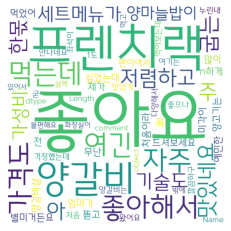

In [25]:
test = wc.generate_from_text(str(n_review["comment"]))
plt.imshow(test)
plt.axis("off")
plt.show()

In [26]:
# wc.to_file("test.png")